In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
def agglomerative_clustering(data, k):
    n = len(data)
    distance_matrix = squareform(pdist(data))  # Pairwise distance matrix
    
    # Hierarchical clustering using complete linkage
    linkage_matrix = linkage(distance_matrix, method='complete')
    
    # Perform clustering to obtain labels
    labels = np.zeros(n, dtype=int)
    for i, (_, _, _, cluster_size) in enumerate(linkage_matrix):
        if cluster_size == 1:
            labels[int(linkage_matrix[i, 0])] = i  # Assign individual data points
    
    return labels

# Generate synthetic data for testing
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=(0, 0), scale=1, size=(50, 2)),
                       np.random.normal(loc=(5, 5), scale=1, size=(50, 2)),
                       np.random.normal(loc=(10, 0), scale=1, size=(50, 2))])



In [4]:
# Apply agglomerative clustering
k = 3
labels = agglomerative_clustering(data, k)

C:\Users\Atowar\AppData\Local\Temp\ipykernel_14024\2804900847.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='complete')


C:\Users\Atowar\AppData\Local\Temp\ipykernel_14024\62518869.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram(linkage(squareform(pdist(data)), method='complete'))


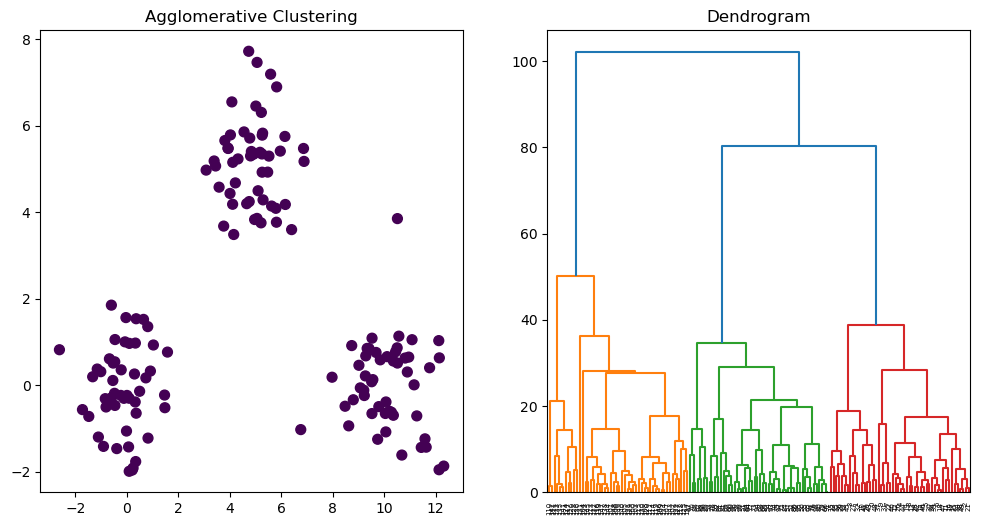

In [5]:



# Plot the results and dendrogram
plt.figure(figsize=(12, 6))

# Scatter plot of the clusters
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')

# Dendrogram
plt.subplot(1, 2, 2)
dendrogram(linkage(squareform(pdist(data)), method='complete'))
plt.title('Dendrogram')

plt.show()